In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import pymn
import os
seed=10
os.chdir(".../Atlas/objects")
sc.logging.print_versions()
!pip list 

-----
anndata     0.8.0
scanpy      1.9.1
-----
PIL                 9.2.0
asttokens           NA
backcall            0.2.0
bottleneck          1.3.5
cffi                1.15.1
colorama            0.4.5
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.2
debugpy             1.6.3
decorator           4.4.2
defusedxml          0.7.1
entrypoints         0.4
executing           1.0.0
google              NA
h5py                3.7.0
igraph              0.9.11
ipykernel           6.15.3
ipython_genutils    0.2.0
ipywidgets          8.0.2
jedi                0.18.0
joblib              1.2.0
jupyter_server      2.0.4
kiwisolver          1.4.4
leidenalg           0.8.10
llvmlite            0.39.1
louvain             0.8.0
matplotlib          3.6.0
mpl_toolkits        NA
natsort             8.2.0
networkx            2.8.6
numba               0.56.2
numpy               1.23.2
packaging           21.3
pandas              1.5.3
parso               0.8.1
pexpect             4.

In [2]:
%matplotlib inline

In [78]:
#These save characters as text in PDFs
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

#These change plot aesthetics

sns.set(style='white', font_scale=1.25)
plt.rc("axes.spines", top=False, right=False)
plt.rc('xtick', bottom=True)
plt.rc('ytick', left=True)

In [4]:
adata = sc.read("Atlas6.5_raw.h5ad")
go_sets = pd.read_csv(".../Atlas/MN/go_sets_human.csv", index_col="Unnamed: 0")

In [29]:
adata.obs['cell.type'] = adata.obs['annotation_final_level1'].astype(str)
adata.obs['study_id'] = adata.obs['proj'].astype(str)

In [17]:
nan_count = pd.isna(adata.obs.annotation_final_level1).sum()
nan_count

0

In [31]:
os.chdir(".../Atlas/MN/Atlas6.5_all_proj")

In [32]:
pymn.variableGenes(adata, study_col='study_id')

In [33]:
pymn.MetaNeighborUS(adata,
                    study_col='study_id',
                    ct_col='cell.type',
                    fast_version=True)

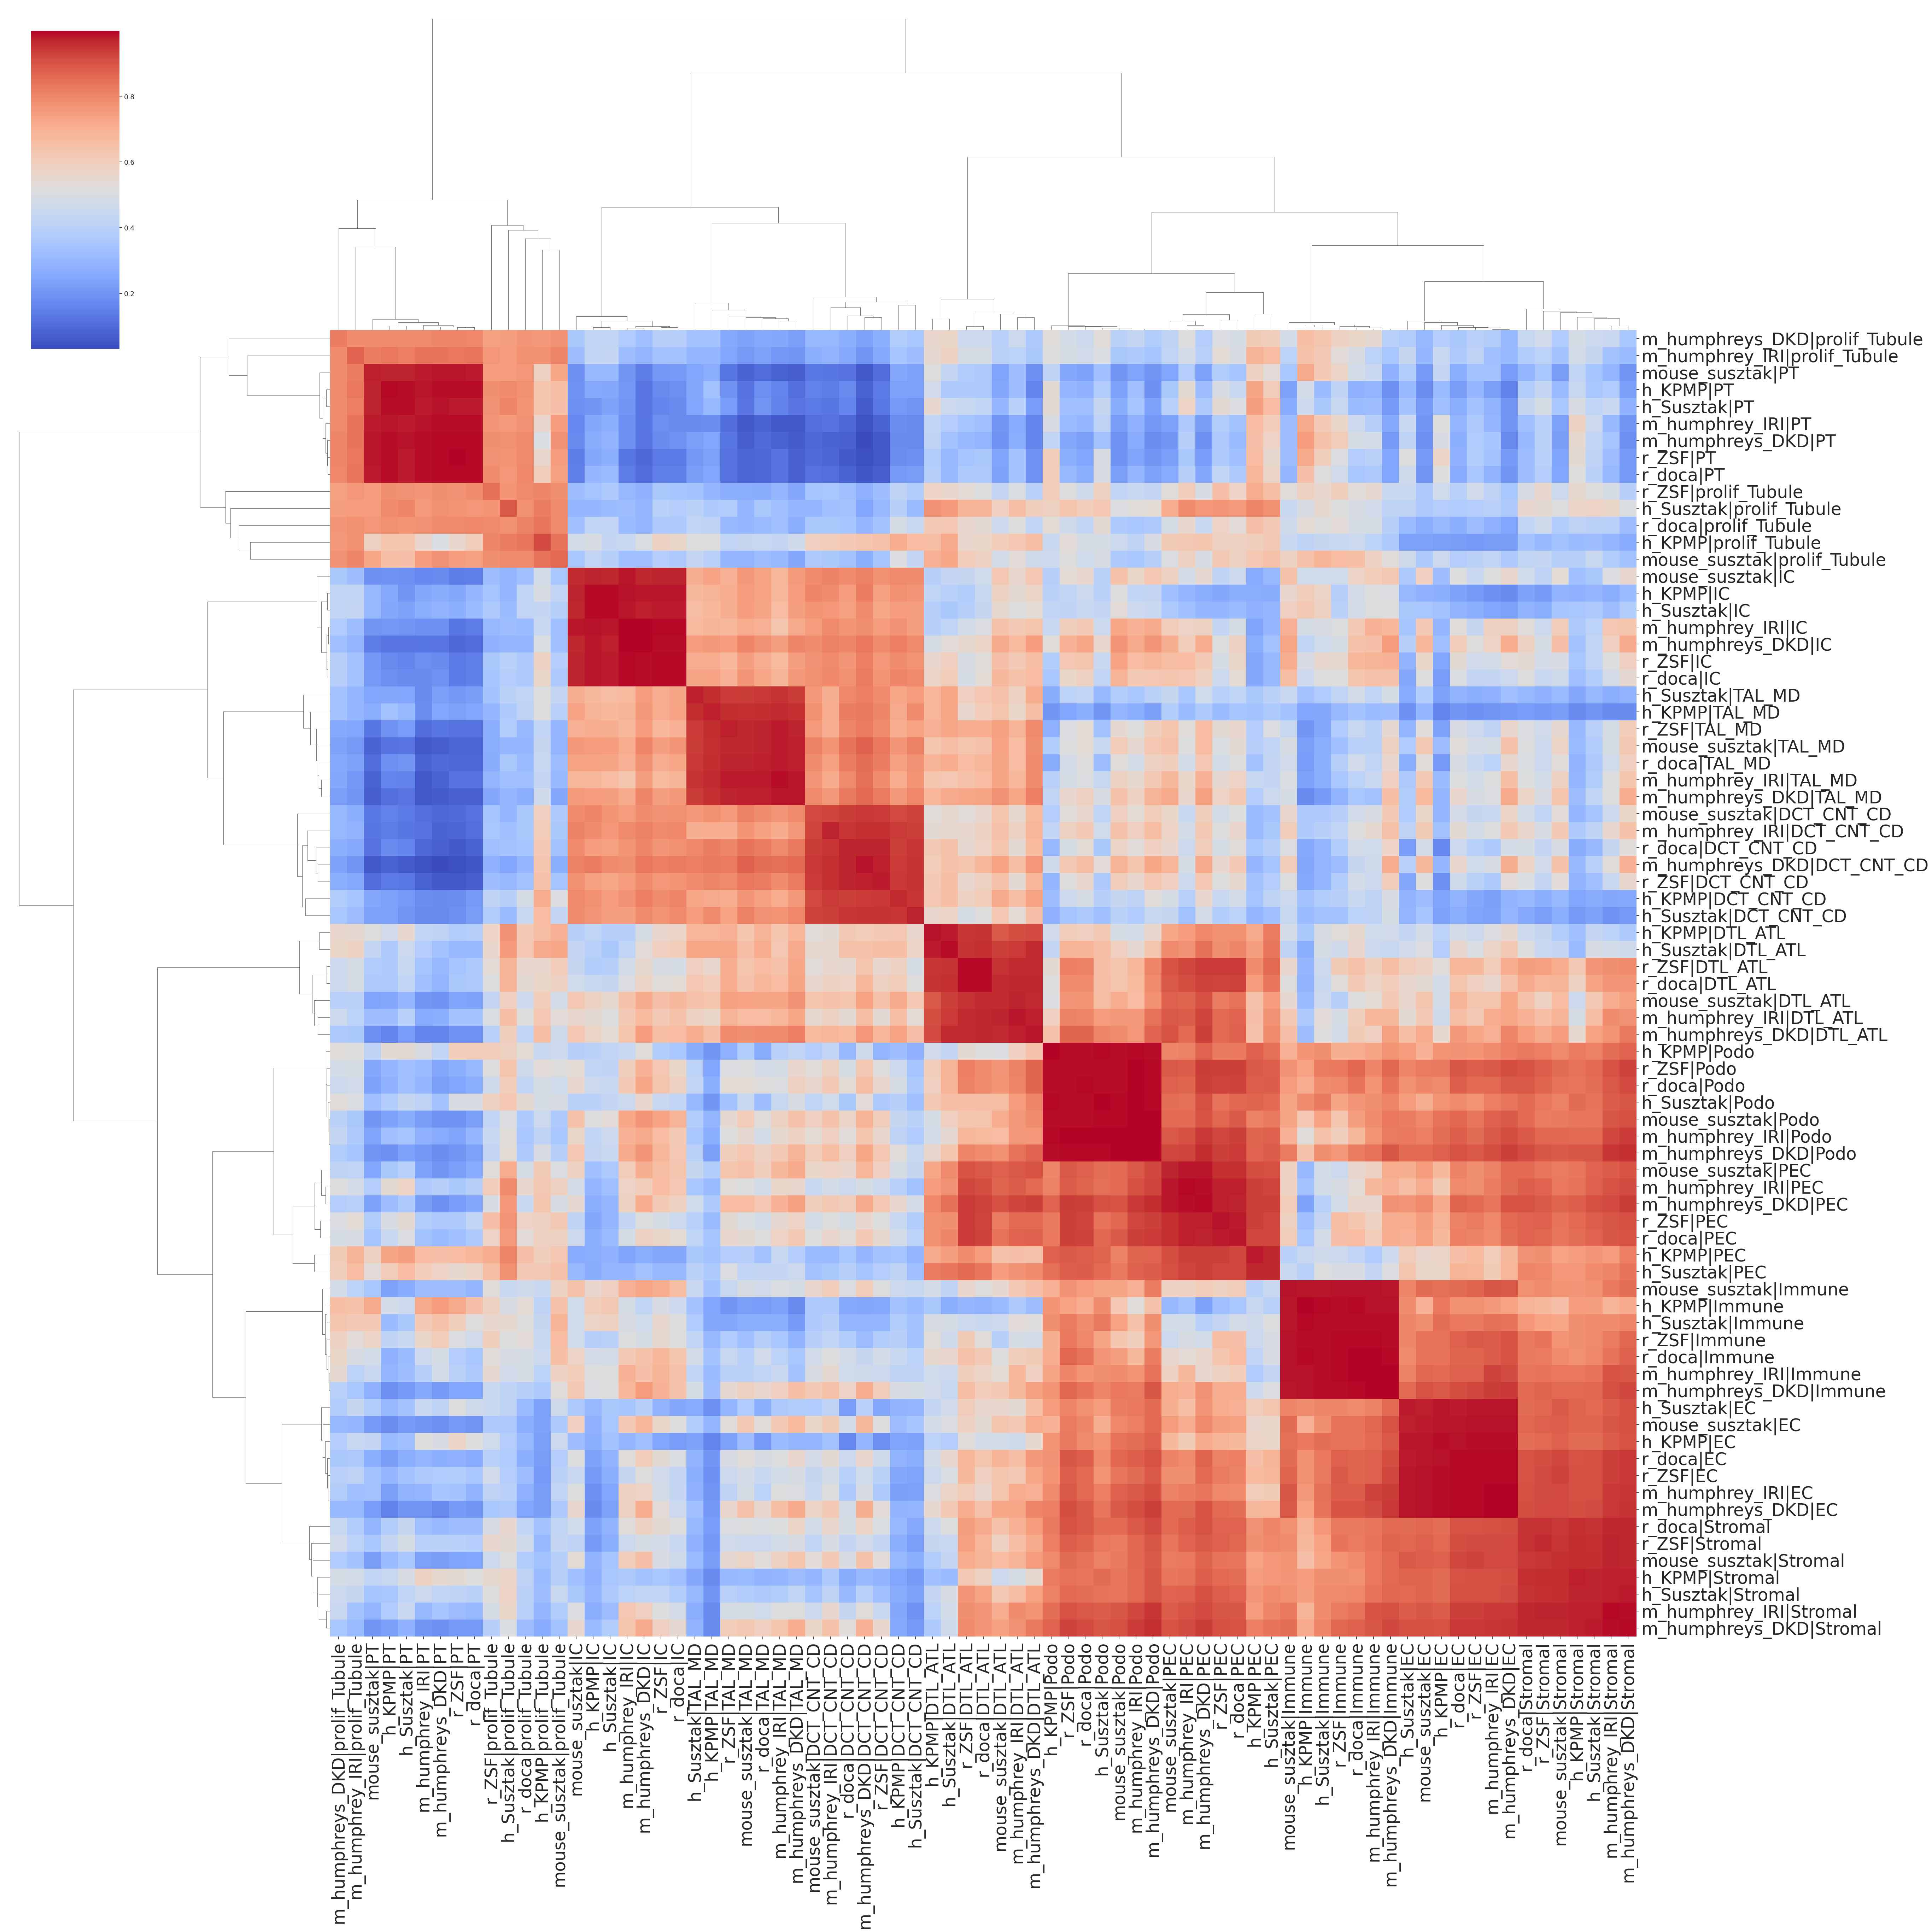

In [40]:
pymn.plotMetaNeighborUS(adata, figsize=(50, 50), cmap='coolwarm', fontsize=35)